In [3]:
import pandas as pd
from datetime import datetime
from matplotlib.pyplot import Rectangle
from matplotlib.patches import Arc, ConnectionPatch
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def get_match_id(team1, team2, str_date, nationality):
    
    matches_dataset = pd.read_json(('./dataset/matches/matches_%s.json' % nationality))
    
    date = datetime.strptime(str_date, '%Y-%m-%d')
    for i in range(len(matches_dataset)):
        match_id = matches_dataset['wyId'][i]
        match_label = matches_dataset['label'][i]
        str_match_date = matches_dataset['dateutc'][i]
        
        match_date = datetime.strptime(str_match_date, '%Y-%m-%d %H:%M:%S')
        if date.year == match_date.year and date.month == match_date.month and date.day == match_date.day:
            if team1 in match_label and team2 in match_label:
                return match_id
            
    return -1

In [5]:
def get_player_id(name, last_name):
    name = name.lower()
    last_name = last_name.lower()
    
    players = pd.read_json(str('./dataset/players.json'))
    
    for i in range(len(players)):
        player_id = players['wyId'][i]
        player_name = players['firstName'][i] + players['middleName'][i] + players['lastName'][i]
        player_name = player_name.lower()
        if name in player_name and last_name in player_name:
            return player_id
        
    return -1

In [6]:
def get_match_events(events_dataset, match_id, player1_id, player2_id):
    event_types = ['pass', 'shot', 'duel', 'free kick']
    events = {player1_id:[], player2_id:[]}
    
    for i in range(len(events_dataset)):
        event_match_id = events_dataset['matchId'][i]
        
        if event_match_id == match_id:
            player_id = events_dataset['playerId'][i]
            
            if player1_id == player_id or player2_id == player_id:    
                event_type = events_dataset['eventName'][i]
    
                if event_type.lower() in event_types:
                    
                    positions = events_dataset['positions'][i]
                    match_period = events_dataset['matchPeriod'][i]
                    
                    positions = [positions[0]['x'], 100 - positions[0]['y']]
                    
                    if match_period == '1H' and False:
                        positions[0] = 100 - positions[0]
                        positions[1] = 100 - positions[1]
                        
                    positions[0] = 120 * positions[0] * 0.01
                    positions[1] = 80 * positions[1] * 0.01
                    
                    events[player_id].append(positions)
                  
    return events

In [7]:
def get_match_events(events_dataset, match_id, player1_id, player2_id):
    event_types = ['pass', 'shot', 'duel', 'free kick']
    events = {player1_id:[], player2_id:[]}
    
    for i in range(len(events_dataset)):
        event_match_id = events_dataset['matchId'][i]
        
        if event_match_id == match_id:
            player_id = events_dataset['playerId'][i]
            
            if player1_id == player_id or player2_id == player_id:    
                event_type = events_dataset['eventName'][i]
    
                if event_type.lower() in event_types:
                    
                    positions = events_dataset['positions'][i]
                    match_period = events_dataset['matchPeriod'][i]
                    
                    positions = [positions[0]['x'], 100 - positions[0]['y']]
                    
                    if match_period == '1H' and False:
                        positions[0] = 100 - positions[0]
                        positions[1] = 100 - positions[1]
                        
                    positions[0] = 120 * positions[0] * 0.01
                    positions[1] = 80 * positions[1] * 0.01
                    
                    events[player_id].append(positions)
                  
    return events

In [8]:
def print_field_performance(positions, color):
    # Print the field
    fig=plt.figure() #set up the figures
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax) #overlay our different objects on the pitch
    plt.ylim(-2, 82)
    plt.xlim(-2, 122)
    plt.axis('off')
    # End drawing field
    
    x_positions = [p[0] for p in positions]
    y_positions = [p[1] for p in positions]
    
    sns.kdeplot(x_positions, y_positions, shade = "True", color = color, n_levels = 30)
   
    plt.show()

In [9]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)


In [18]:
spain_events = pd.read_json('./dataset/events/events_Spain.json')
spain_matches = pd.read_json('./dataset/matches/matches_Spain.json')

In [20]:
match_id = get_match_id('Barcelona', 'Real Madrid', '2018-5-6', 'Spain')

In [21]:
spain_matches.head()

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,795,"May 20, 2018 at 8:45:00 PM GMT+2",2018-05-20 18:45:00,Regular,38,"Barcelona - Real Sociedad, 1 - 0","[{'refereeId': 398931, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'676': {'scoreET': 0, 'coachId': 92894, 'side...",Camp Nou,676,2565922
1,795,"May 20, 2018 at 6:30:00 PM GMT+2",2018-05-20 16:30:00,Regular,38,"Atl\u00e9tico Madrid - Eibar, 2 - 2","[{'refereeId': 395056, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'679': {'scoreET': 0, 'coachId': 3427, 'side'...",Estadio Wanda Metropolitano,0,2565925
2,795,"May 20, 2018 at 4:15:00 PM GMT+2",2018-05-20 14:15:00,Regular,38,"Athletic Club - Espanyol, 0 - 1","[{'refereeId': 384957, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'691': {'scoreET': 0, 'coachId': 444778, 'sid...",San Mam\u00e9s Barria,691,2565919
3,795,"May 20, 2018 at 12:00:00 PM GMT+2",2018-05-20 10:00:00,Regular,38,"Valencia - Deportivo La Coru\u00f1a, 2 - 1","[{'refereeId': 398913, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'674': {'scoreET': 0, 'coachId': 210074, 'sid...",Estadio de Mestalla,674,2565924
4,795,"May 19, 2018 at 8:45:00 PM GMT+2",2018-05-19 18:45:00,Regular,38,"Villarreal - Real Madrid, 2 - 2","[{'refereeId': 395085, 'role': 'referee'}, {'r...",4406122,181144,Played,"{'675': {'scoreET': 0, 'coachId': 275283, 'sid...",Estadio de la Cer\u00e1mica,0,2565927


In [22]:
ronaldo_id = get_player_id('Cristiano', 'Ronaldo')
messi_id = get_player_id('Lionel', 'Messi')

In [24]:
events = get_match_events(spain_events, match_id, ronaldo_id, messi_id)

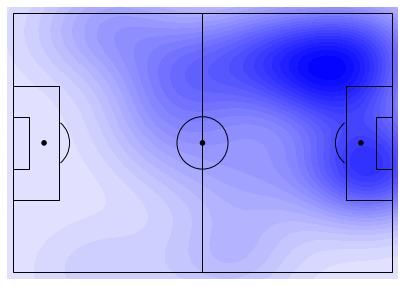

In [25]:
print_field_performance(events[ronaldo_id], 'blue')

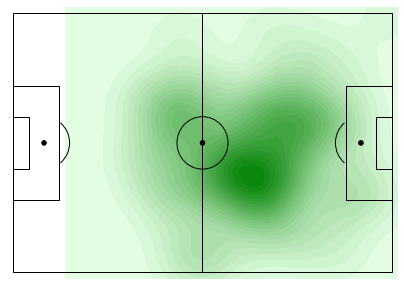

In [26]:
print_field_performance(events[messi_id], 'green')

In [27]:
italy_matches = pd.read_json('./dataset/matches/matches_Italy.json')

In [28]:
italy_matches.head()

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,524,"May 20, 2018 at 8:45:00 PM GMT+2",2018-05-20 18:45:00,Regular,38,"Lazio - Internazionale, 2 - 3","[{'refereeId': 377206, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3162': {'scoreET': 0, 'coachId': 251025, 'si...",,3161,2576335
1,524,"May 20, 2018 at 8:45:00 PM GMT+2",2018-05-20 18:45:00,Regular,38,"Sassuolo - Roma, 0 - 1","[{'refereeId': 377255, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3158': {'scoreET': 0, 'coachId': 210119, 'si...",MAPEI Stadium - Citt\u00e0 del Tricolore,3158,2576336
2,524,"May 20, 2018 at 6:00:00 PM GMT+2",2018-05-20 16:00:00,Regular,38,"Cagliari - Atalanta, 1 - 0","[{'refereeId': 377247, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3173': {'scoreET': 0, 'coachId': 251044, 'si...",,3173,2576329
3,524,"May 20, 2018 at 6:00:00 PM GMT+2",2018-05-20 16:00:00,Regular,38,"Chievo - Benevento, 1 - 0","[{'refereeId': 377246, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3165': {'scoreET': 0, 'coachId': 272970, 'si...",,3165,2576330
4,524,"May 20, 2018 at 6:00:00 PM GMT+2",2018-05-20 16:00:00,Regular,38,"Udinese - Bologna, 1 - 0","[{'refereeId': 377254, 'role': 'referee'}, {'r...",4406278,181248,Played,"{'3166': {'scoreET': 0, 'coachId': 20481, 'sid...",,3163,2576331


In [29]:
juv_nap_match_id = get_match_id('Juventus', 'Napoli', '2018-04-22', 'Italy')

In [30]:
juv_nap_match_id

2576295

In [31]:
italy_events = pd.read_json('./dataset/events/events_Italy.json')

In [33]:
jorginho_id = get_player_id('Jorge Luiz', 'Filho')
pjanic_id = get_player_id('Miralem', 'Pjani')

In [34]:
jorginho_id

21315

In [36]:
pjanic_id

20443

In [37]:
def get_passes_from_events(events_dataset, match_id, player1_id, player2_id):
    
    event_types = ['pass']
    events = {player1_id:[], player2_id:[]}
    
    for i in range(len(events_dataset)):
        event_match_id = events_dataset['matchId'][i]
        
        if event_match_id == match_id:
            player_id = events_dataset['playerId'][i]
            
            if player1_id == player_id or player2_id == player_id:    
                event_type = events_dataset['eventName'][i]
    
                if event_type.lower() in event_types:
                    
                    positions = events_dataset['positions'][i]
                    match_period = events_dataset['matchPeriod'][i]
                    additional_tags = [e['id'] for e in italy_events['tags'][i]]
                    
                    start_position = [positions[0]['x'], 100 - positions[0]['y']]
                    ending_position = [positions[1]['x'], 100 - positions[1]['y']]
                    
                    successful = False
                    if 1801 in additional_tags:
                        successful = True
                    
                    positions = [start_position, ending_position, successful]
                    
                    positions[0][0] = 120 * positions[0][0] * 0.01
                    positions[1][0] = 120 * positions[1][0] * 0.01
                    
                    positions[0][1] = 80 * positions[0][1] * 0.01
                    positions[1][1] = 80 * positions[1][1] * 0.01
                    
                    events[player_id].append(positions)
                  
    return events

In [42]:
juv_nap_passes = get_passes_from_events(italy_events, juv_nap_match_id, jorginho_id, pjanic_id)
juv_nap_passes


{21315: [[[56.4, 20.0], [74.4, 23.2], True],
  [[85.2, 44.800000000000004], [82.8, 46.4], False],
  [[56.4, 22.400000000000002], [73.2, 3.2], True],
  [[68.4, 57.6], [92.4, 53.6], True],
  [[73.2, 60.0], [88.8, 69.60000000000001], True],
  [[76.8, 61.6], [85.2, 64.0], True],
  [[67.2, 20.0], [87.60000000000001, 20.0], True],
  [[32.4, 24.0], [32.4, 35.2], False],
  [[31.2, 29.6], [34.800000000000004, 38.4], True],
  [[46.800000000000004, 26.400000000000002],
   [69.60000000000001, 15.200000000000001],
   True],
  [[39.6, 11.200000000000001], [49.2, 16.8], True],
  [[82.8, 60.0], [99.60000000000001, 72.8], True],
  [[76.8, 59.2], [67.2, 68.8], True],
  [[76.8, 11.200000000000001], [81.60000000000001, 5.6000000000000005], True],
  [[73.2, 8.0], [69.60000000000001, 17.6], True],
  [[62.4, 37.6], [60.0, 21.6], True],
  [[73.2, 58.4], [86.4, 76.0], True],
  [[72.0, 61.6], [88.8, 60.0], True],
  [[81.60000000000001, 50.4], [84.0, 41.6], True],
  [[74.4, 18.400000000000002], [90.0, 11.2000000

In [44]:

jorginho_passes = juv_nap_passes[jorginho_id]
pjanic_passes = juv_nap_passes[pjanic_id]

In [45]:
jorginho_passes

[[[56.4, 20.0], [74.4, 23.2], True],
 [[85.2, 44.800000000000004], [82.8, 46.4], False],
 [[56.4, 22.400000000000002], [73.2, 3.2], True],
 [[68.4, 57.6], [92.4, 53.6], True],
 [[73.2, 60.0], [88.8, 69.60000000000001], True],
 [[76.8, 61.6], [85.2, 64.0], True],
 [[67.2, 20.0], [87.60000000000001, 20.0], True],
 [[32.4, 24.0], [32.4, 35.2], False],
 [[31.2, 29.6], [34.800000000000004, 38.4], True],
 [[46.800000000000004, 26.400000000000002],
  [69.60000000000001, 15.200000000000001],
  True],
 [[39.6, 11.200000000000001], [49.2, 16.8], True],
 [[82.8, 60.0], [99.60000000000001, 72.8], True],
 [[76.8, 59.2], [67.2, 68.8], True],
 [[76.8, 11.200000000000001], [81.60000000000001, 5.6000000000000005], True],
 [[73.2, 8.0], [69.60000000000001, 17.6], True],
 [[62.4, 37.6], [60.0, 21.6], True],
 [[73.2, 58.4], [86.4, 76.0], True],
 [[72.0, 61.6], [88.8, 60.0], True],
 [[81.60000000000001, 50.4], [84.0, 41.6], True],
 [[74.4, 18.400000000000002], [90.0, 11.200000000000001], True],
 [[76.8, 16

In [79]:
def print_performance_with_arrows(positions, color, print_only_accurate=False):
    # Print the field
    fig=plt.figure() #set up the figures
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax) #overlay our different objects on the pitch
    plt.ylim(-2, 82)
    plt.xlim(-2, 122)
    plt.axis('off')
    # End drawing field
    
    # Heatmap
    x_positions = [p[0][0] for p in positions]
    y_positions = [p[0][1] for p in positions]
    
    sns.kdeplot(x_positions, y_positions, shade = "True", color = color, n_levels = 30)
       
    #Arrows
    for p in positions:
        is_accurate = p[2]
        
        start_x = p[0][0]
        start_y = p[0][1]
        
        end_x = p[1][0]
        end_y = p[1][1]
        
        if print_only_accurate:
            if is_accurate:
                ax.annotate("", xy = (end_x,end_y), xycoords = 'data',
                   xytext = (start_x, start_y), textcoords = 'data',
                   arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "green"),)
        else:
            ax.annotate("", xy = (end_x,end_y), xycoords = 'data',
                   xytext = (start_x, start_y), textcoords = 'data',
                   arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = "blue"),)

    plt.show()

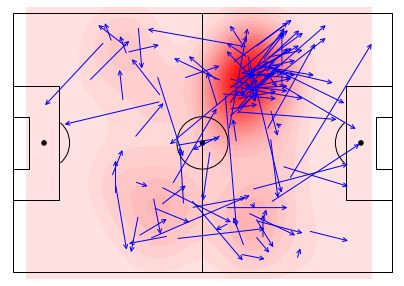

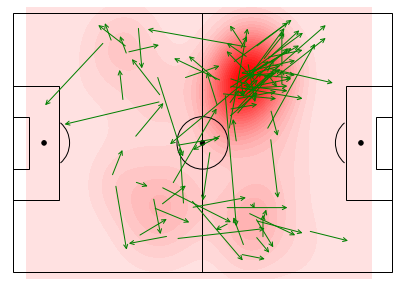

In [80]:
print_performance_with_arrows(jorginho_passes, 'red', print_only_accurate=False)
print_performance_with_arrows(jorginho_passes, 'red', print_only_accurate=True)

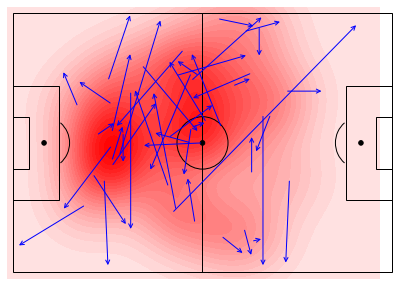

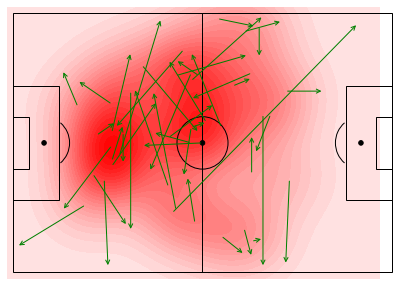

In [81]:
print_performance_with_arrows(pjanic_passes, 'red', print_only_accurate=False)
print_performance_with_arrows(pjanic_passes, 'red', print_only_accurate=True)